This material covers exploratory analysis and understanding of data through data visualization using the Python.

In this material, we will use the dataset from the file dados.csv.


Importing Libraries.

In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset.

In [ ]:
# Loading dataset from 'dados.csv' file with ';' separator
data = pd.read_csv('dados.csv', sep=';')

# Displaying the dimensions of the dataset
data.shape

# Displaying the first few rows of the dataset
data.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


We identified that the dataset has 4 columns and 187 rows. There are 3 numeric columns and 1 categorical column. We have two numeric columns that we can analyze: 'pib' and 'valorempenho'.

Analysis through the division of displays, of the 4 boxplot graphs using the Seaborn library.

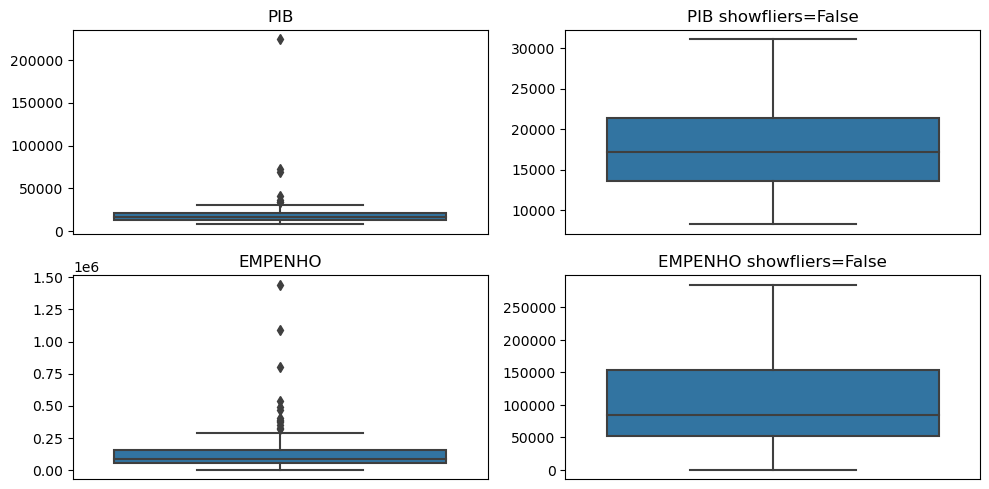

In [ ]:
# Creating a 2x2 subplot layout
plt.figure(figsize=(10, 5))

# Subplot 1: Boxplot of 'PIB'
plt.subplot(2, 2, 1)
plt.title('PIB')
sns.boxplot(data.PIB)
plt.xticks([])

# Subplot 2: Boxplot of 'PIB' without outliers
plt.subplot(2, 2, 2)
sns.boxplot(data.PIB, showfliers=False)
plt.title('PIB showfliers=False')
plt.xticks([])

# Subplot 3: Boxplot of 'VALOREMPENHO'
plt.subplot(2, 2, 3)
plt.title('EMPENHO')
sns.boxplot(data.VALOREMPENHO)
plt.xticks([])

# Subplot 4: Boxplot of 'VALOREMPENHO' without outliers
plt.subplot(2, 2, 4)
plt.title('EMPENHO showfliers=False')
sns.boxplot(data.VALOREMPENHO, showfliers=False)
plt.xticks([])

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

Another way to visualize the distribution of data is through a histogram graph.

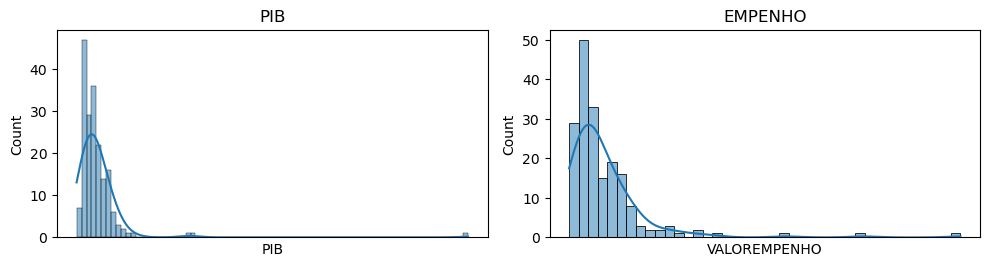

In [ ]:
# Creating a 2x2 subplot layout
plt.figure(figsize=(10, 5))

# Subplot 1: Histogram of 'PIB' with kernel density estimation
plt.subplot(2, 2, 1)
plt.title('PIB')
sns.histplot(data.PIB, kde=True)
plt.xticks([])

# Subplot 2: Histogram of 'VALOREMPENHO' with kernel density estimation
plt.subplot(2, 2, 2)
sns.histplot(data.VALOREMPENHO, kde=True)
plt.title('EMPENHO')
plt.xticks([])

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

Filtering higher values.


Another way to gain insights about the data is by filtering the highest values, which will allow us to better understand the cities with the highest GDPs and the highest expenditure commitments.

To filter the top 10 highest values, we'll use pandas through the DataFrame 'data.sort_values'.

In [ ]:
# Sorting the dataset by 'PIB' in descending order and selecting the top 10 entries
maiores_pib = data.sort_values(by='PIB', ascending=False).head(10)

# Displaying the top 10 entries with highest 'PIB'
maiores_pib

# Sorting the dataset by 'VALOREMPENHO' in descending order and selecting the top 10 entries
maiores_empenho = data.sort_values(by='VALOREMPENHO', ascending=False).head(10)

# Displaying the top 10 entries with highest 'VALOREMPENHO'
maiores_empenho

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
4,120,SAO GABRIEL,19912.38,533719.86
3,13,CACAPAVA DO SUL,13674.54,485535.86
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
9,153,URUGUAIANA,21084.19,401124.62
8,126,SAO LUIZ GONZAGA,15887.14,385185.68
5,98,QUARAI,12552.51,381286.24
10,36,DOM PEDRITO,19013.71,371857.25



Now that we've assigned the highest values for both GDP and Commitment Spending, we will generate a bar chart, which will enable better visualization of the data.

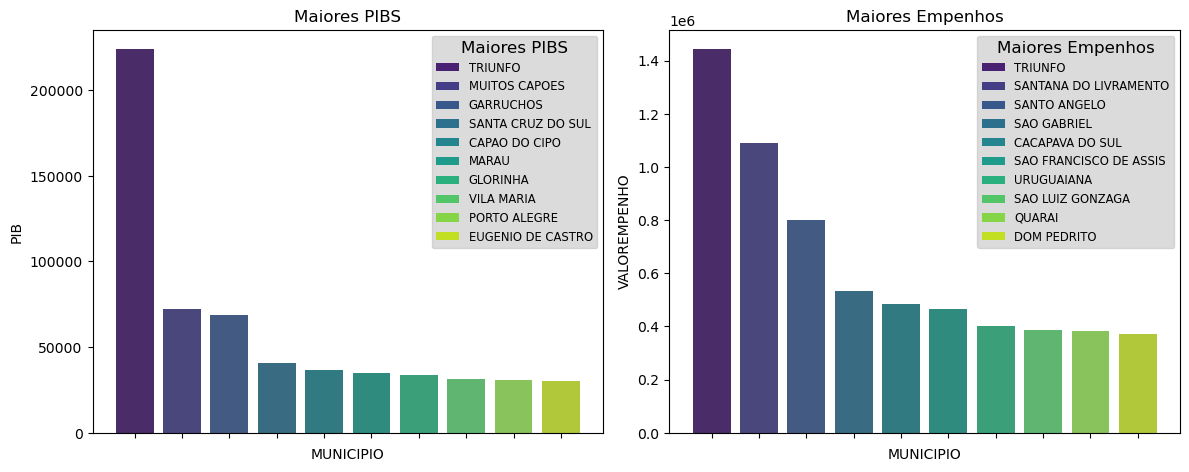

In [ ]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure with a size of 12x9 inches
plt.figure(figsize=(12, 9))

# Subplot 1: Bar plot for 'Maiores PIBS'
plt.subplot(2, 2, 1)
grafico = sns.barplot(x='MUNICIPIO', y='PIB', data=maiores_pib, palette='viridis')
cores = sns.color_palette('viridis', len(maiores_pib))
for i, munic in enumerate(maiores_pib['MUNICIPIO']):
    plt.bar(0, 0, color=cores[i], label=munic)
grafico.set_xticklabels([])
plt.legend(title='Maiores PIBS', title_fontsize='12', loc='upper right', fontsize='small', facecolor='lightgrey')
plt.title('Maiores PIBS')

# Subplot 2: Bar plot for 'Maiores Empenhos'
plt.subplot(2, 2, 2)
grafico = sns.barplot(x='MUNICIPIO', y='VALOREMPENHO', data=maiores_empenho, palette='viridis')
cores = sns.color_palette('viridis', len(maiores_empenho))
for i, munic in enumerate(maiores_empenho['MUNICIPIO']):
    plt.bar(0, 0, color=cores[i], label=munic)
grafico.set_xticklabels([])
plt.legend(title='Maiores Empenhos', title_fontsize='12', loc='upper right', fontsize='small', facecolor='lightgrey')
plt.title('Maiores Empenhos')

# Adjusting layout
plt.tight_layout()
# Displaying the plot
plt.show()


Here we can analyze and see that in cases where the GDP is lower, the commitment value is usually higher, and vice versa.

Let's now see the difference between the GDP value and Commitment Spending as a proportion of GDP.

In [ ]:
data['diferenca'] = data.VALOREMPENHO / data.PIB

maiores_diferenca = data.sort_values(by = 'diferenca', ascending = False).head(10)

maiores_diferenca


,CODIGO,MUNICIPIO,PIB,VALOREMPENHO,diferenca
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10,88.937787
1,113,SANTO ANGELO,16575.82,800669.92,48.303488
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80,38.722205
3,13,CACAPAVA DO SUL,13674.54,485535.86,35.506559
5,98,QUARAI,12552.51,381286.24,30.375299
6,95,PIRATINI,10811.67,315884.50,29.216994
7,325,TUNAS,11543.02,326884.60,28.318811
4,120,SAO GABRIEL,19912.38,533719.86,26.803419
11,248,AMARAL FERRADOR,9216.87,235327.02,25.532206
8,126,SAO LUIZ GONZAGA,15887.14,385185.68,24.245124


Text(0, 0.5, 'Gastos em Proporção ao PIB')

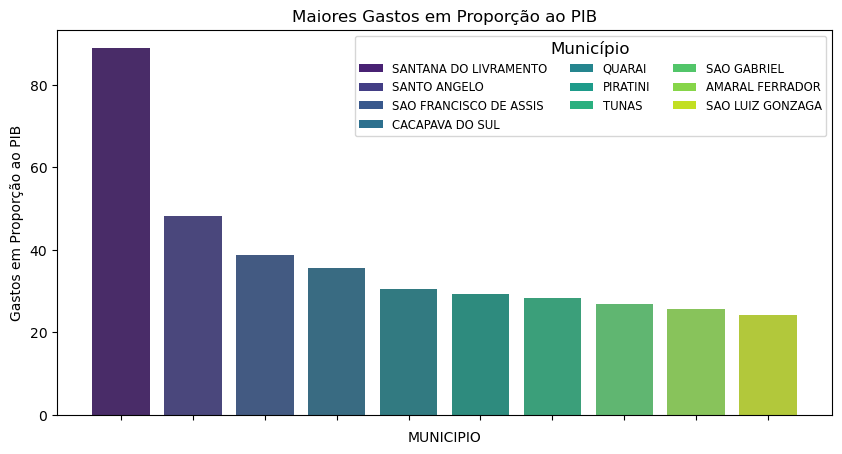

In [ ]:
plt.figure(figsize=(10, 5))
# Define os dados e cria o gráfico de barras com a paleta de cores Viridis
grafico = sns.barplot(x='MUNICIPIO', y='diferenca', data=maiores_diferenca, palette='viridis')
# Obtém as cores padrão do Seaborn (que correspondem à paleta Viridis)
cores = sns.color_palette('viridis', len(maiores_diferenca))
# Adiciona a legenda com os rótulos dos municípios e cores correspondentes
for i, munic in enumerate(maiores_diferenca['MUNICIPIO']):
    plt.bar(0, 0, color=cores[i], label=munic)
# Remove a descrição do eixo x
grafico.set_xticklabels([])
# Remove o eixo x completamente
# Exibe a legenda
plt.legend(title='Município', title_fontsize='12', loc='upper right', fontsize='small', ncol=3)
plt.title('Maiores Gastos em Proporção ao PIB')
plt.ylabel('Gastos em Proporção ao PIB')